# Review Ratings Challenge

**Task:** Import review_ratings_headers.txt file

In [1]:
file = open('review_ratings_headers.txt', 'r')

**Task:**
1. Extract "user" and "id" from the first line and combine with an underscore.
1. In each line after the first line, extract the word(s) after "on" in each line, removing special characters (e.g. /n, &, etc.). 
1. If there is more than one word, combine the words with a single underscore. 
1. Put the words into a list to use as headers for your dataset later.

In [2]:
file = open('review_ratings_headers.txt', 'r')
all_lines = file.readlines()
import re

#task 1
line_1 = all_lines[0]
new_line_1 = line_1[line_1.find('user'):line_1.find('user')+4] + '_' + line_1[line_1.find('id'):line_1.find('id')+2]

#task 2-3
other_lines = all_lines[1:]
new_other_lines = other_lines

for i in range(24):
    current_line = other_lines[i]
    new_other_lines[i] = current_line[current_line.find('on')+3:]
    new_other_lines[i] = re.sub('[^A-Za-z]+', ' ', new_other_lines[i])
    new_other_lines[i] = re.sub(r'\s', '_', new_other_lines[i][:-1])
    
#task 4
header_list = list(new_other_lines)
header_list.insert(0, new_line_1)

Question 1: How many headers are there with 2 or more words combined by an underscore?

In [3]:
count = 0
for header in header_list:
    if re.search('_', header):
        count = count + 1
print(count)

Question 2: How many underscores are there in all of the headers?

In [4]:
count = 0
for header in header_list:
    count = count + len(re.findall('_', header))
print(count)

**Task:** Read in review_ratings.csv, set names as the cleaned headers list from above, skip the first row, and do not include an index column

In [5]:
import pandas as pd
ratings = pd.read_csv('review_ratings.csv', header = 0, names = header_list, 
            index_col = False, skiprows = 0)
#to clarify: I'm assuming by "skip the first row" you meant us to 
#get rid of the row that contains the old headers, not the first row of data


Question 3: How many rows are in the ratings dataset?

In [6]:
print(ratings.shape[0])

4624


**Task:** Import review_ratings_with_headers.csv

In [7]:
ratings_with_headers = pd.read_csv('review_ratings_with_headers.csv')

**Task:** Explore data types in the dataset

In [8]:
print(ratings_with_headers.dtypes)
#everything is a float, except for user_id and art_galleries which are strings

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries             object
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object


Question 4: What data type is local_services?

In [9]:
ratings_with_headers.dtypes.local_services

dtype('float64')

**Task:** Find special characters that are in one of the columns, replace with 0, and convert to continuous/float type

In [10]:
ratings_with_headers.art_galleries = [re.sub('[^0-9\.]+', '0', row) for row in ratings_with_headers.art_galleries]
ratings_with_headers.art_galleries = [float(row) for row in ratings_with_headers.art_galleries]

Question 5: What was the string that contained the special characters?

In [11]:
original_data = pd.read_csv('review_ratings_with_headers.csv')
special_characters = []
for row in original_data.art_galleries:
    if re.findall('[^0-9\.]+', row) != []:
        special_characters.append(re.findall('[^0-9\.]+', row))
print(special_characters)

[['qh']]


Question 6: What is the mean of the variable now that it has been converted to type continuous/float?

In [12]:
import statistics
round(statistics.mean(ratings_with_headers.art_galleries), 1)

2.2

**Task:** Fill missing values with 0 and run summary statistics on the dataset

In [13]:
for row in range(ratings_with_headers.shape[0]):
    for column in range(1,ratings_with_headers.shape[1]):
        if pd.isnull(ratings_with_headers.iloc[row, column]):
            ratings_with_headers.iloc[row, column] = 0

ratings_with_headers.describe(include = 'all')

,user_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
count,4624,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,...,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000,4624.000000
unique,4624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,User 3654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.455822,2.317331,2.482007,2.796265,2.953977,2.893343,3.354189,2.548054,3.144027,...,2.203406,1.194271,0.954007,0.825424,0.960783,0.993854,0.973227,1.758545,1.535264,1.561068
std,NaN,0.819186,1.418414,1.242288,1.313560,1.338313,1.281503,1.413699,1.112429,1.357523,...,1.719475,1.108272,0.980365,0.953209,1.186662,1.188229,0.931104,1.598310,1.314480,1.164068
min,NaN,0.000000,0.000000,0.000000,0.830000,1.120000,1.110000,1.120000,0.860000,0.840000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.920000,1.360000,1.540000,1.720000,1.770000,1.780000,1.930000,1.620000,1.800000,...,0.860000,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.750000,0.800000,0.890000
50%,NaN,1.330000,1.890000,2.060000,2.450000,2.660000,2.685000,3.230000,2.190000,2.820000,...,1.320000,0.800000,0.740000,0.680000,0.690000,0.690000,0.770000,1.040000,1.070000,1.290000
75%,NaN,1.810000,2.670000,2.730000,4.110000,4.310000,3.830000,5.000000,3.200000,5.000000,...,4.690000,1.160000,0.920000,0.840000,0.860000,0.860000,1.010000,2.080000,1.560000,1.650000


Question 7: What is the IQR of ratings for resorts?

In [14]:
from scipy import stats
round(stats.iqr(ratings_with_headers.resorts), 2)

1.31

**Task:** Import review_ratings_processed.csv

In [18]:
processed_reviews = pd.read_csv('review_ratings_processed.csv')

**Task:** Find the variables that are most correlated with each other

In [355]:
import numpy as np
import math

#find covariance matrix and take the absolute value
cov_matrix = abs(processed_reviews.corr())

#take out all values along or above diagonal 
for i in range(int(math.sqrt(cov_matrix.size))):
    cov_matrix.iloc[i, i:] = 0
    
#sort remaining values
unstacked = cov_matrix.unstack(level=0)
sorted = unstacked.sort_values(kind = 'quicksort', ascending= False)

Question 8: Which variables are included in the **top 10** **most** correlated (based on absolute value)? 

In [356]:
print(sorted[0:10])
#note: "zoo" in the fourth line is missing simply due to the formatting of 
#the unstack function. "zoo" is repeated in the line above it, so the blank
#implies the tag of "zoo" is attached to both

parks                  theatres          0.628782
restaurants            pubs_bars         0.567785
zoo                    pubs_bars         0.554357
                       restaurants       0.545238
swimming_pools         gyms              0.521543
hotels_other_lodgings  juice_bars        0.515170
churches               gardens           0.499185
theatres               museums           0.484519
view_points            monuments         0.470440
pubs_bars              local_services    0.466849
dtype: float64


**Task:** Group each variable into 10 equal-width bins and calculate the **mean malls** rating for each bin

In [159]:
mean_malls = pd.DataFrame(np.nan, index = [0,1,2,3,4,5,6,7,8,9], 
                          columns = processed_reviews.columns[1:25])

for i in range(1,25):
    results = scipy.stats.binned_statistic(processed_reviews.iloc[:,i], processed_reviews.malls, statistic='mean', bins = 10)
    mean_malls.iloc[:,i-1] = results.statistic
    
mean_malls

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,2.598077,2.269200,3.280000,2.874359,3.349252,2.601246,1.340558,2.756607,2.325376,3.155915,...,1.918000,3.537979,3.767985,3.661285,3.629669,3.411139,3.254379,2.872500,2.695347,2.692692
1,3.914725,4.027637,3.858857,3.487610,3.049089,2.826261,1.712772,2.553054,2.142506,2.640525,...,3.349185,3.651278,3.535192,3.478043,3.471572,3.525351,3.525116,3.828774,3.766375,3.969731
2,3.699982,3.729012,3.761190,3.121394,2.613950,2.767188,2.064079,3.235824,2.749792,2.865628,...,2.833913,2.481172,2.486317,2.593765,3.310789,3.521134,3.642295,3.925520,3.682373,3.656942
3,3.107195,3.256582,3.509275,3.479620,3.590670,2.788949,2.501687,3.759788,3.673906,3.278309,...,3.816801,3.433249,3.719365,1.715000,3.397576,3.313611,3.442936,3.044331,2.873820,2.868889
4,2.441447,3.012050,3.021541,3.573629,3.719982,3.708124,2.867361,3.419259,3.360843,3.771962,...,3.463488,2.314667,2.615000,1.574098,1.694369,1.676415,1.577931,2.066737,2.064286,1.942008
5,1.672541,2.343925,3.066178,4.446307,4.383946,3.955402,3.231337,3.422559,3.984607,3.450294,...,2.687857,1.614583,1.891667,2.032368,2.432656,1.976364,1.270000,2.110233,1.383704,1.386160
6,3.305000,1.984643,2.799310,3.506296,2.424902,3.620465,3.774000,4.333158,3.535922,3.185787,...,4.190494,2.276667,3.962222,5.000000,3.646364,4.121944,4.124000,2.519167,1.522895,1.795937
7,1.973214,2.341607,2.766897,3.188257,3.610225,4.247529,4.101765,4.720773,3.139568,3.000459,...,4.368000,2.558286,2.923333,1.215000,2.893333,1.313684,1.191176,1.271039,1.455758,1.971724
8,2.672414,2.150000,2.441525,2.459907,4.506536,3.562734,4.383824,4.031781,3.153241,3.288947,...,4.437391,3.282500,1.880000,2.255000,1.542105,2.061000,1.833571,2.622353,2.497333,2.600857
9,3.285658,3.694151,3.406963,3.120872,3.233678,4.085667,4.990811,4.306942,4.088241,3.910365,...,3.481717,3.126667,2.524265,2.490057,2.261713,2.437439,2.066566,2.442299,3.057512,2.984435


Question 9: Which chart below matches mean **mall** rating by **juice_bar** bins?

<function matplotlib.pyplot.show(*args, **kw)>

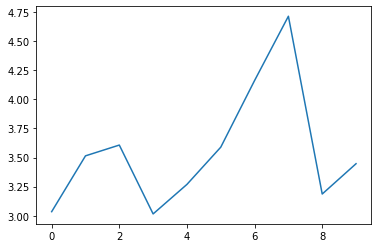

In [195]:
import matplotlib.pyplot as plt

plt.plot(range(0,10), mean_malls.juice_bars)
plt.show

#none of the charts match the below chart

**Task:** Split dataset into features that include all variables except **juice_bars** and user_id

In [301]:
features = processed_reviews.drop('juice_bars', axis=1)
features = features.drop('user_id', axis=1)

**Task:** Set your seed to 42 and split the data into **80%** training and **20%** test sets 

In [303]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, processed_reviews.juice_bars, test_size = .2, random_state = 42)

**Task:** Set seed to 42 and fit a Random Forest with **10 trees/estimators** to the training set

In [304]:
from sklearn.ensemble import RandomForestRegressor

#Note: although not explicitly specified I'm assuming that here we are 
#fitting a training set to predict the juice_bar rating

regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
fit = regressor.fit(x_train, y_train)


Question 10: What R-Squared value did the model achieve on the test set?

In [305]:
predictions = regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.7502168906163271

**Task:** Predict **juice_bars** ratings for the full dataset (training and test combined) and append predictions to the table

In [306]:
total_predictions = regressor.predict(features)
features['juice_bar_predictions'] = total_predictions

**Task:** Compute the squared residual for each user id, append to table and sort descending by squared residual 

In [316]:
residuals2 = (processed_reviews.juice_bars - total_predictions)**2
features['user_id_residuals'] = residuals2
features = features.sort_values(by=['user_id_residuals'], ascending=False)

Question 11: Which IDs are included in the **top 10** losses as measured by squared residual

In [318]:
features['user_id'] = processed_reviews.user_id
print(features.iloc[0:10,25:26])
features = features.drop('user_id', axis=1)

        user_id
8     User 1578
2305   User 634
2939  User 4288
2170  User 5383
3471  User 2122
4065  User 5356
61    User 5418
3790   User 629
1507  User 2733
598   User 2074


**Task:** Extract the first tree/estimator from the Random Forest Model

In [324]:
first_tree = regressor.estimators_[0]

**Task:** Plot the decision tree with **max depth of 3**

In [ ]:
!conda install graphviz --yes

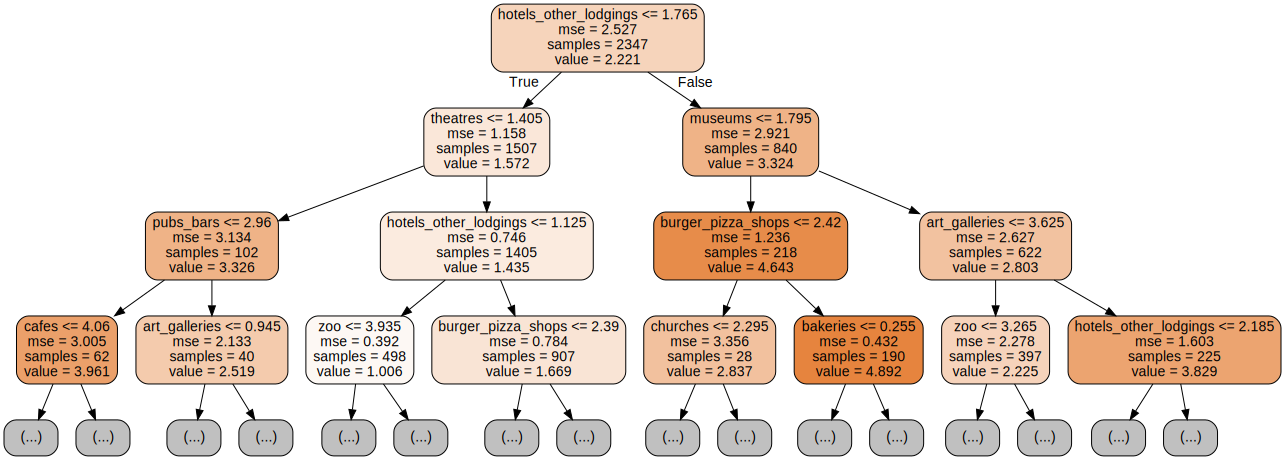

In [354]:
old_features = processed_reviews.drop('juice_bars', axis=1)
old_features = old_features.drop('user_id', axis=1)

from sklearn.tree import export_graphviz
export_graphviz(first_tree, max_depth = 3, feature_names = old_features.columns, filled = True, rounded=True, out_file='tree.dot')

Source.from_file('tree.dot')

In [ ]:
Question 12: Which variable does the tree split on **first**?

In [ ]:
#as seen above, the variable first splits on hotels_other_lodgings

**Task:** Create a sparse matrix with Location (e.g. resorts, beauty_spas, swimming_pools, etc.) on the rows and UserID on the columns with ratings as the values (fill any missing ratings for users with 0)

In [458]:
transposed = processed_reviews.transpose()
transposed = transposed.drop('user_id')
transposed.columns = processed_reviews.user_id

sparse_matrix = transposed.astype(pd.SparseDtype(fill_value = 0))

**Task:** Apply a brute-force K-Nearest Neighbors algorithm to the matrix with a cosine metric 

In [459]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

Question 13: Which categories are included in the top 5 nearest neighbors to **swimming_pools**?

In [476]:
distances, indices = model_knn.kneighbors(sparse_matrix.iloc[16,:].values.to_dense().reshape(1,-1), n_neighbors = 6)
print(sparse_matrix.index.values[indices])
#obviously swimming pools does not count as the nearest neighbor to itself, so I've printed
#the first six values. The top 5 nearest neighbors are gyms, dance clubs, churches, gardens,
#and burger/pizza shops. 

[['swimming_pools' 'gyms' 'dance_clubs' 'churches' 'gardens'
  'burger_pizza_shops']]
